In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Traffic Management system/traffic.csv')

In [4]:
df

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Junction'].plot(kind='hist', bins=20, title='Junction')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Vehicles'].plot(kind='hist', bins=20, title='Vehicles')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Junction', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Junction', y='Vehicles', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Vehicles', y='ID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Vehicles']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Vehicles')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['ID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('ID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

In [8]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1U0N2bDtNMO-L6fSt3jgQA-nCNxlQaljO3MBxDehqNPE#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [5]:
print(df.isnull().sum())

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


In [7]:
print(df.duplicated().sum())

0


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [13]:
# Converting junction and ID to categorical varibles
df['Junction'] = df['Junction'].astype('category')
df['ID'] = df['ID'].astype('category')

# Converting Datetime to dtype Datetime
df['Datetime'] = pd.to_datetime(df['DateTime'])
# Extracting Year, Month, Day and Hour from datetime
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour

# Exploratory Data Analysis

In [14]:
# Grouping data by junction
junction_data = df.groupby('Junction')['Vehicles'].sum().reset_index()

print(junction_data)

# Analyzing the vehicles by hour of the day
hourly_data = df.groupby('Hour')['Vehicles'].sum().reset_index()

print(hourly_data)

  Junction  Vehicles
0        1    657412
1        2    207983
2        3    199823
3        4     31501
    Hour  Vehicles
0      0     47199
1      1     39408
2      2     34291
3      3     29769
4      4     26011
5      5     24408
6      6     26025
7      7     29480
8      8     32888
9      9     38856
10    10     48581
11    11     55128
12    12     56950
13    13     51305
14    14     55544
15    15     55439
16    16     53482
17    17     53430
18    18     56331
19    19     59859
20    20     59799
21    21     56547
22    22     54590
23    23     51399


<ipython-input-14-52e6c71d1a10>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  junction_data = df.groupby('Junction')['Vehicles'].sum().reset_index()


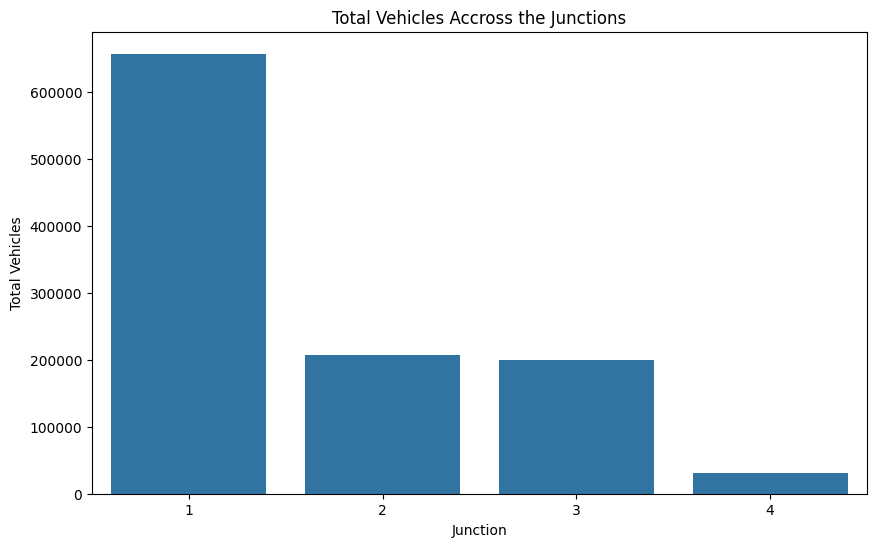

Text(0, 0.5, 'Total Vehicles')

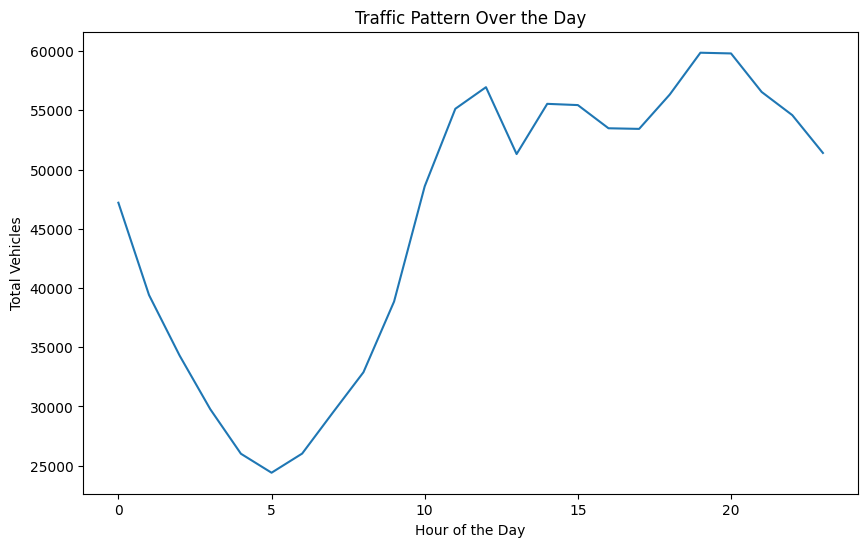

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting traffic accross junctions
plt.figure(figsize=(10,6))
sns.barplot(x='Junction', y='Vehicles', data=junction_data)
plt.title('Total Vehicles Accross the Junctions')
plt.xlabel('Junction')
plt.ylabel('Total Vehicles')
plt.show()

# Traffic Pattern over the day
plt.figure(figsize=(10,6))
sns.lineplot(x='Hour', y='Vehicles', data=hourly_data)
plt.title('Traffic Pattern Over the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Vehicles')

In [20]:
# Creating lag features to account for traffic in the previous hours
df['Vehicles_lag_1'] = df['Vehicles'].shift(1)
df['Vehicles_lag_2'] = df['Vehicles'].shift(2)
df[['Vehicles_lag_1', 'Vehicles_lag_2']] = df[['Vehicles_lag_1', 'Vehicles_lag_2']].fillna(0)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
X = df[['Junction', 'ID', 'Year', 'Month', 'Day', 'Hour', 'Vehicles_lag_1', 'Vehicles_lag_2']]
y = df['Vehicles']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 15.130444981296758


# Hyperparameter Tuning

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f'Best Parameters: {best_params}')
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Mean Squared Error (Best Model): {mse_best}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Mean Squared Error (Best Model): 14.556881219613215
